In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from fxdayu_alphaman.factor.factor import Factor

class Factor_Volume001(Factor):

    c = 6

    def calculate_volume001(self, data):
        # 逐支股票计算volume003因子
        candle_data = data[1].dropna()
        if len(candle_data) == 0:
            return
        high = candle_data["high"]
        volume = candle_data["volume"]
        adv_s = self.ts_mean(volume, 10)
        factor_volume001 = - self.correlation(high, adv_s, self.c) #计算因子值
        factor_volume001.index = candle_data.index
        factor_volume001 = pd.DataFrame(factor_volume001)
        factor_volume001.columns = [data[0],]
        return  factor_volume001

    def factor_calculator(self, pn_data):
        # volume001
        factor_volume001 = map(self.calculate_volume001, pn_data.iteritems())
        factor_volume001 = pd.concat(factor_volume001, axis=1)
        factor_volume001 = self.winsorize(factor_volume001) #去极值
        factor_volume001 = self.standardize(factor_volume001) #标准化
#         factor_volume001 = self.neutralize(factor_volume001, factorIsMV=False) #行业、市值中性化
        factor_volume001 = self.factor_df_to_factor_mi(factor_volume001) #格式标准化
#         factor_volume001 = self.get_factor_by_rankScore(factor_volume001, ascending=True) # 将因子用排序分值重构，并处理到0-1之间(默认为升序——因子越大 排序分值越大(越好)
                                                                                          # 具体根据因子对收益的相关关系而定，为正则应用升序,为负用降序)
        return factor_volume001

In [2]:
# -*- coding: utf-8 -*-

#######################################################
#
# 因子器基本功能测试 以volume001为例
#
########################################################


from datetime import datetime
from fxdayu_data import DataAPI
from fxdayu_alphaman.factor.utility import standard_code_style
from fxdayu_alphaman.factor.admin import Admin
import tushare as ts

#初始选股范围设置
def coder(code):
    if code.startswith('6'):
        return code + '.XSHG'
    elif code.startswith('0') or code.startswith('3'):
        return code + '.XSHE'
    else:
        return code

name = ts.get_hs300s()
name_list = list(name.code)
codes = tuple(map(coder, name_list))
print(codes)

('002230.XSHE', '002299.XSHE', '601225.XSHG', '002174.XSHE', '601727.XSHG', '600019.XSHG', '601127.XSHG', '002385.XSHE', '601216.XSHG', '300070.XSHE', '000709.XSHE', '002074.XSHE', '600074.XSHG', '000983.XSHE', '300133.XSHE', '300072.XSHE', '601118.XSHG', '300059.XSHE', '000826.XSHE', '300144.XSHE', '600867.XSHG', '300024.XSHE', '002131.XSHE', '002152.XSHE', '600188.XSHG', '600010.XSHG', '600009.XSHG', '000792.XSHE', '300002.XSHE', '600048.XSHG', '002739.XSHE', '300017.XSHE', '300033.XSHE', '000778.XSHE', '600271.XSHG', '300058.XSHE', '601258.XSHG', '601600.XSHG', '300251.XSHE', '000060.XSHE', '600383.XSHG', '600875.XSHG', '002146.XSHE', '600111.XSHG', '600256.XSHG', '601933.XSHG', '600873.XSHG', '600446.XSHG', '300027.XSHE', '000027.XSHE', '000425.XSHE', '600583.XSHG', '300168.XSHE', '002153.XSHE', '601021.XSHG', '000977.XSHE', '000555.XSHE', '000402.XSHE', '002183.XSHE', '600352.XSHG', '600157.XSHG', '000876.XSHE', '600582.XSHG', '601611.XSHG', '000800.XSHE', '000630.XSHE', '600718.X

In [3]:
# 测试参数设置
start = datetime(2015, 1, 1)
end = datetime(2016, 4, 18, 15)
periods = (1, 5, 10)

DataAPI.set_file('D:/PycharmProjects/Selector/examples/work_space/config.py')

# 获取数据
PN = DataAPI.factor(codes, ('high','close', 'volume'), start=start, end=end)
prices = PN.minor_xs('close')
print PN
print prices

<class 'pandas.core.panel.Panel'>
Dimensions: 297 (items) x 314 (major_axis) x 3 (minor_axis)
Items axis: 000001.XSHE to 603993.XSHG
Major_axis axis: 2015-01-05 15:00:00 to 2016-04-18 15:00:00
Minor_axis axis: close to volume
                     000001.XSHE  000002.XSHE  000008.XSHE  000009.XSHE  \
datetime                                                                  
2015-01-05 15:00:00       10.867       13.844        4.984          NaN   
2015-01-06 15:00:00       10.704       13.333        5.014          NaN   
2015-01-07 15:00:00       10.500       13.213        5.129        9.810   
2015-01-08 15:00:00       10.148       12.619        5.292        9.824   
2015-01-09 15:00:00       10.229       12.489        5.322        9.552   
2015-01-12 15:00:00       10.019       12.182        5.402        9.420   
2015-01-13 15:00:00        9.958       12.136        5.501        9.729   
2015-01-14 15:00:00       10.046       12.164        5.402        9.684   
2015-01-15 15:00:00     

In [4]:
def unit_test1(data):
    volume001 = Factor_Volume001()
    factor = volume001.factor(data)
    return factor

factor = unit_test1(PN)
print factor

D:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


                                   factor
date                asset                
2015-01-23 15:00:00 000001.XSHE -0.522577
                    000002.XSHE -0.776399
                    000008.XSHE  0.353736
                    000027.XSHE  0.897875
                    000039.XSHE  1.040377
                    000060.XSHE  1.462682
                    000061.XSHE -0.816581
                    000063.XSHE  1.974305
                    000100.XSHE -0.462562
                    000156.XSHE -0.969866
                    000157.XSHE -0.495282
                    000333.XSHE -0.158768
                    000338.XSHE -0.293722
                    000402.XSHE -0.037679
                    000423.XSHE  0.692135
                    000425.XSHE  0.361662
                    000503.XSHE -0.993919
                    000538.XSHE  0.285871
                    000540.XSHE -1.231712
                    000555.XSHE -1.251225
                    000559.XSHE -1.005984
                    000568.XSHE  0

因子的IC值：
                           1         5         10
date                                             
2015-01-23 15:00:00  0.019877  0.035718 -0.048363
2015-01-26 15:00:00 -0.034091 -0.186256 -0.053578
2015-01-27 15:00:00 -0.006880 -0.242404 -0.147552
2015-01-28 15:00:00 -0.068660 -0.235780 -0.172415
2015-01-29 15:00:00 -0.115076 -0.145672 -0.086823
2015-01-30 15:00:00  0.145630 -0.062791  0.008304
2015-02-02 15:00:00 -0.191091 -0.138584  0.044878
2015-02-03 15:00:00  0.155766  0.044228  0.250672
2015-02-04 15:00:00  0.036724  0.089378  0.171891
2015-02-05 15:00:00  0.045599  0.051179  0.084023
2015-02-06 15:00:00  0.021183 -0.021860  0.046119
2015-02-09 15:00:00 -0.122571 -0.129529 -0.069244
2015-02-10 15:00:00 -0.165271 -0.129513 -0.068247
2015-02-11 15:00:00 -0.015551  0.007071 -0.012601
2015-02-12 15:00:00 -0.157596 -0.007093 -0.048875
2015-02-13 15:00:00 -0.238257 -0.071739 -0.133583
2015-02-16 15:00:00  0.132494  0.149226  0.100678
2015-02-17 15:00:00  0.209484  0.181146  0

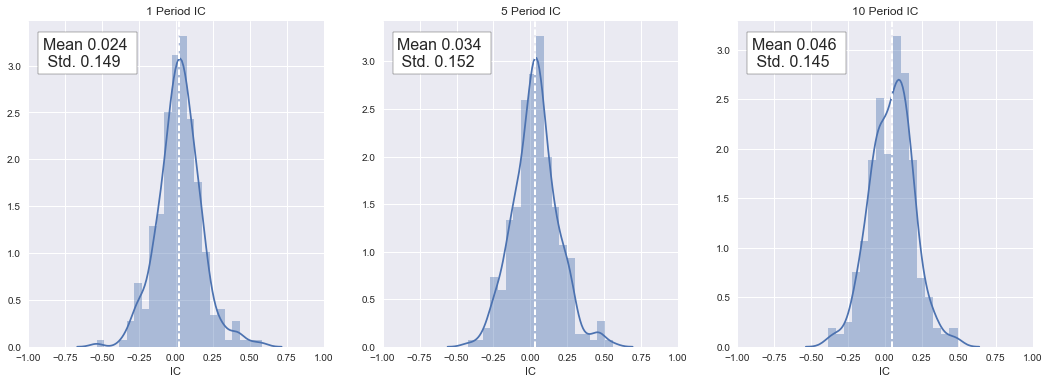

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


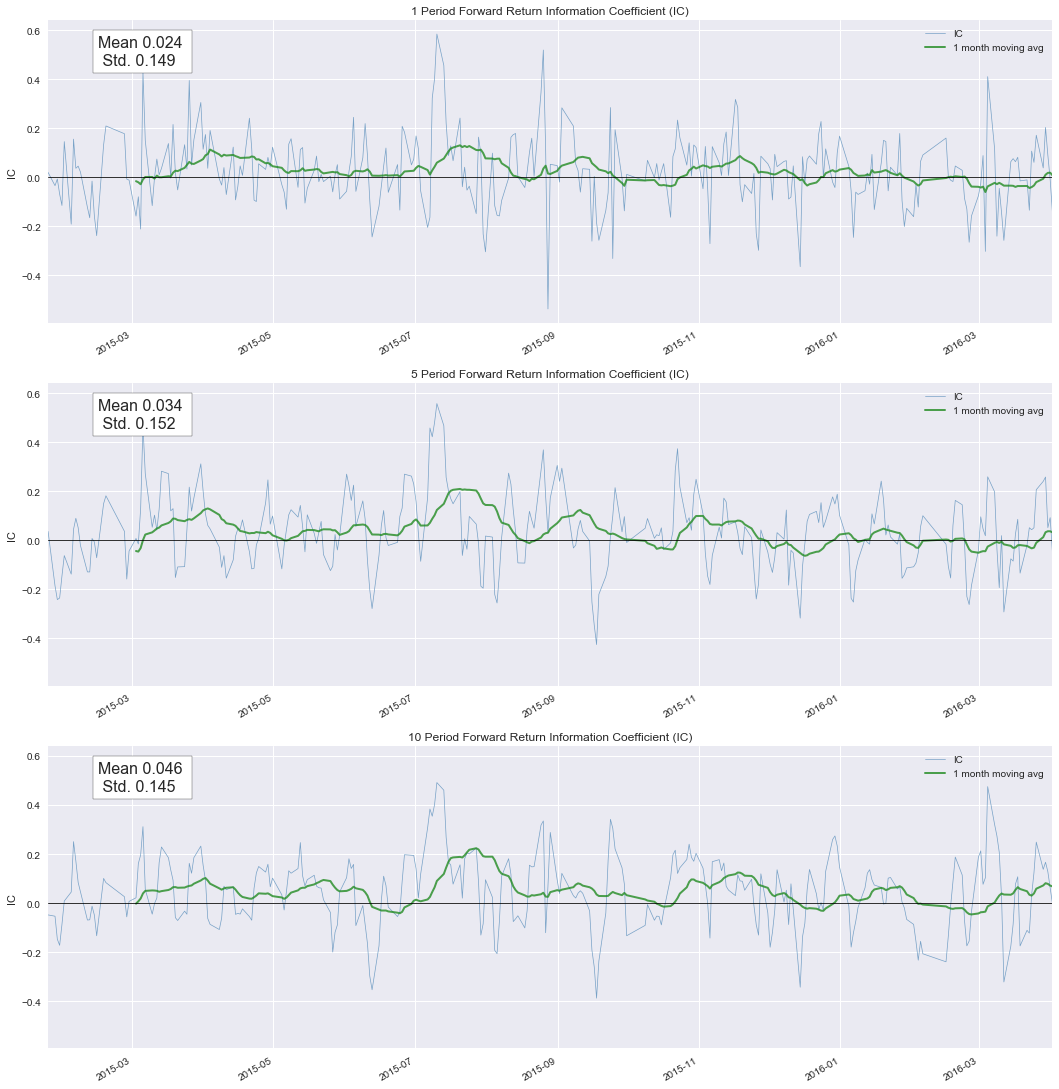

平均IC值-月：


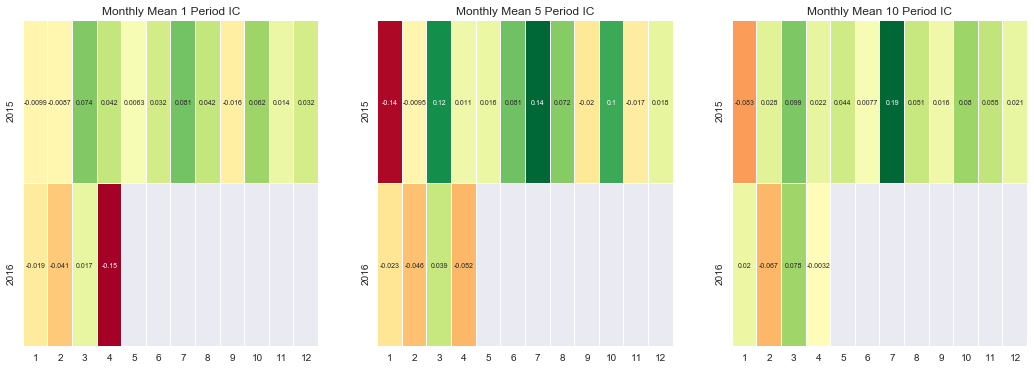

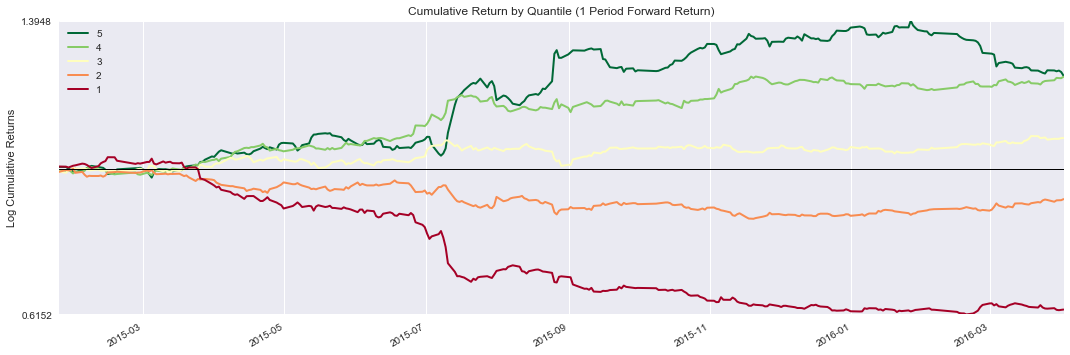

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


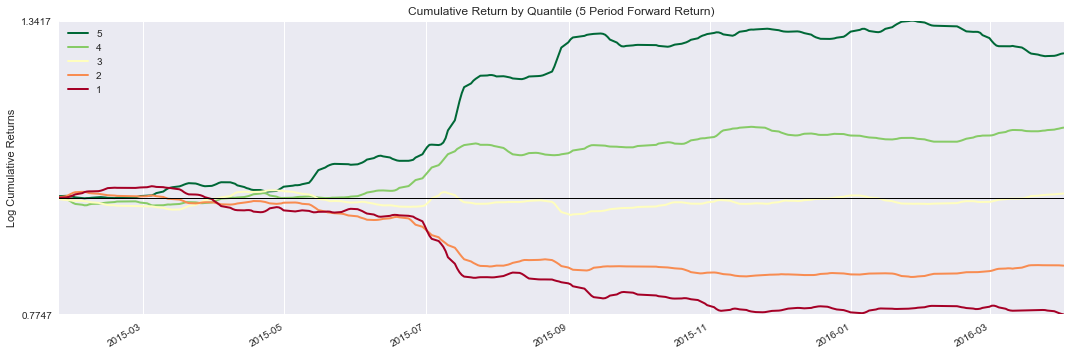

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


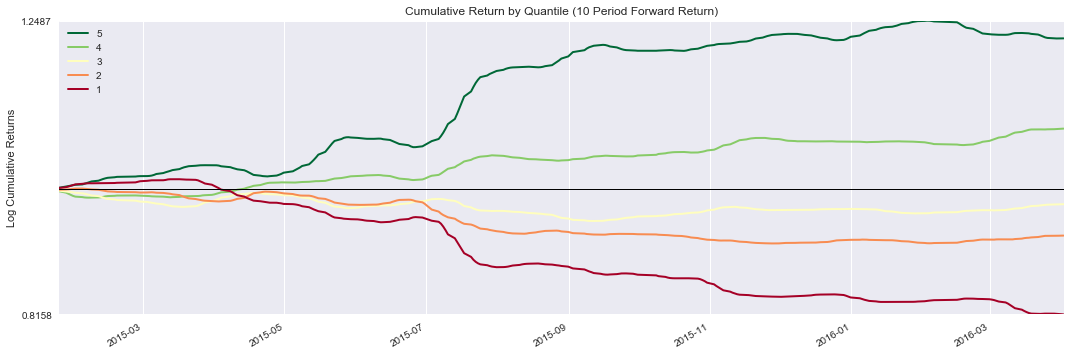

In [5]:
def test_performance(factor, prices):
    import matplotlib.pyplot as plt
    from alphalens import utils,performance,plotting

    # 持股收益-逐只
    stocks_holding_return = utils.get_clean_factor_and_forward_returns(factor,prices,quantiles=5,periods=(1,5,10))

    print("因子的IC值：")
    ic = performance.factor_information_coefficient(stocks_holding_return)
    print(ic)
    plotting.plot_ic_hist(ic)
    plt.show()
    plotting.plot_ic_ts(ic)
    plt.show()
    
    
    print("平均IC值-月：")
    mean_ic = performance.mean_information_coefficient(stocks_holding_return,by_time="M")
    plotting.plot_monthly_ic_heatmap(mean_ic)
    plt.show()


    # 按quantile区分的持股平均收益（减去了总体平均值）
    mean_return_by_q = performance.mean_return_by_quantile(stocks_holding_return, by_date=True, demeaned=True)[0]
    # 按quantile画出累积持有收益
    for i in [1, 5, 10]:
        plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, period=i)
        plt.show()

# print factor
test_performance(factor,prices)

In [6]:
## 读取IC历史绩效
admin = Admin()
original_perf = admin.calculate_performance('cool',factor,start,end,periods=(1,5,10),quantiles=5,price=prices)
print(original_perf.mean_ic)

           0
1   0.023590
5   0.033858
10  0.046237


In [7]:
# 参数优化

volume = Factor_Volume001()
para_range_dict = {"c":range(4,11,1)}
factor_value_list,para_dict_list = admin.enumerate_parameter('cool',para_range_dict,codes,start,end, Factor=volume)

factor_name_list = []
for para_dict in para_dict_list:
    factor_name_list.append("Factor_Volume001+" + str(para_dict))

performance_list = admin.show_factors_performance(factor_name_list,factor_value_list,start,end,periods=(1,5,10),quantiles=5,price=prices)

# print("#####################################################################################")
# 按绩效指标对结果排序（寻优） 本例按10天持有期的mean_IC降序排列了所有结果。
performance_list = admin.rank_performance(performance_list,
                                          target_period=10,
                                          ascending=False)

print performance_list[0].mean_ic
print performance_list[0].factor_name

# for perf in performance_list:
#     print("\n")
#     print(perf.mean_ic)
#     print(perf.factor_name)

           0
1   0.023032
5   0.034309
10  0.046060
Factor_Volume001+{'c': 6}


In [8]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=5)

cond = factor_data['factor_quantile'] == 5
Q5 = factor_data[cond]
stocks = pd.Series(True, index=Q5.index)
stocks = stocks.unstack()
stocks[stocks != True] = False
print(stocks)

asset               000001.XSHE 000002.XSHE 000008.XSHE 000009.XSHE  \
date                                                                  
2015-01-23 15:00:00       False       False       False       False   
2015-01-26 15:00:00       False       False       False       False   
2015-01-27 15:00:00       False       False       False        True   
2015-01-28 15:00:00       False       False       False       False   
2015-01-29 15:00:00       False        True       False       False   
2015-01-30 15:00:00       False        True       False       False   
2015-02-02 15:00:00       False        True       False        True   
2015-02-03 15:00:00       False       False       False        True   
2015-02-04 15:00:00       False       False        True       False   
2015-02-05 15:00:00       False       False       False       False   
2015-02-06 15:00:00       False       False       False       False   
2015-02-09 15:00:00       False       False       False       False   
2015-0

## 作业
将因子做参数优化，最后输出最优股票池excel。